# 01 - Exploração dos Dados
Análise inicial do dataset `deslizamento_brasil.json`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
caminho = '../data/deslizamento_brasil.json'
df = pd.read_json(caminho)
df.head()

,id_estacao,municipio,estado,latitude,longitude,declividade,precipitacao_24h,precipitacao_72h,tipo_solo,umidade_solo,densidade_vegetacao,eventos_anteriores,intervencao_humana,indice_risco,categoria_risco
0,OURINHOS,OURINHOS,SP,-23.000556,-49.843333,15.42,42.36,95.67,latossolo,0.73,0.57,0,True,0.30,médio
1,PALMAS,PALMAS,TO,-10.147778,-48.314444,9.37,21.53,57.24,latossolo,0.53,0.61,0,True,0.15,baixo
2,PARANA,PARANA,TO,-12.615000,-47.871944,7.42,19.36,52.78,latossolo,0.51,0.59,0,False,0.00,baixo
3,PARNAIBA,PARNAIBA,PI,-3.086667,-41.783056,5.28,17.43,42.76,arenoso,0.45,0.32,0,True,0.15,baixo
4,PICOS,PICOS,PI,-7.071111,-41.404167,10.32,12.57,31.83,pedregoso,0.36,0.29,0,False,0.10,baixo


## Informações gerais

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_estacao           88 non-null     object 
 1   municipio            88 non-null     object 
 2   estado               88 non-null     object 
 3   latitude             88 non-null     float64
 4   longitude            88 non-null     float64
 5   declividade          88 non-null     float64
 6   precipitacao_24h     88 non-null     float64
 7   precipitacao_72h     88 non-null     float64
 8   tipo_solo            88 non-null     object 
 9   umidade_solo         88 non-null     float64
 10  densidade_vegetacao  88 non-null     float64
 11  eventos_anteriores   88 non-null     int64  
 12  intervencao_humana   88 non-null     bool   
 13  indice_risco         88 non-null     float64
 14  categoria_risco      88 non-null     object 
dtypes: bool(1), float64(8), int64(1), object(5

In [3]:
df.describe()

,latitude,longitude,declividade,precipitacao_24h,precipitacao_72h,umidade_solo,densidade_vegetacao,eventos_anteriores,indice_risco
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,-15.993078,-46.543492,17.097727,44.550682,101.036023,0.668523,0.556364,0.863636,0.438977
std,9.140282,7.235959,8.132383,20.551426,41.948580,0.175961,0.155165,1.095254,0.267616
min,-32.534722,-69.868611,5.280000,5.360000,25.140000,0.210000,0.240000,0.000000,0.000000
25%,-22.733542,-50.400417,10.170000,28.840000,66.900000,0.547500,0.427500,0.000000,0.280000
50%,-18.530665,-45.204861,15.820000,42.885000,101.240000,0.705000,0.575000,0.000000,0.395000
75%,-7.151597,-41.329861,22.080000,58.465000,132.580000,0.812500,0.685000,2.000000,0.642500
max,3.813611,-34.815556,39.140000,92.870000,262.870000,0.940000,0.830000,4.000000,1.000000


## Verificando valores únicos e tipos de solo

In [4]:
df['tipo_solo'].value_counts()

tipo_solo
argiloso          41
latossolo         17
areno-argiloso    10
pedregoso          9
arenoso            6
siltoso            3
basáltico          2
Name: count, dtype: int64

## Distribuição do índice de risco

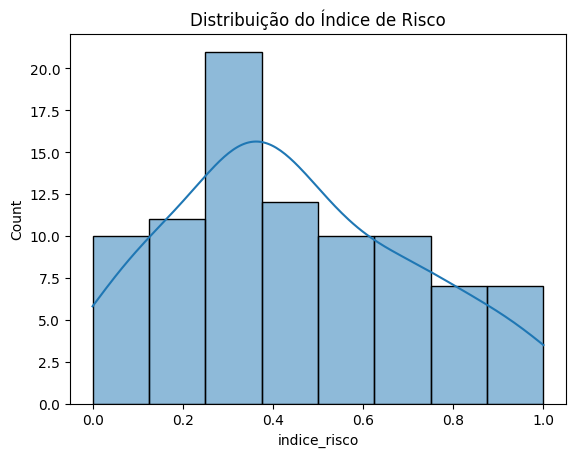

In [5]:
sns.histplot(df['indice_risco'], kde=True)
plt.title('Distribuição do Índice de Risco')
plt.show()

## Relação entre risco e variáveis numéricas

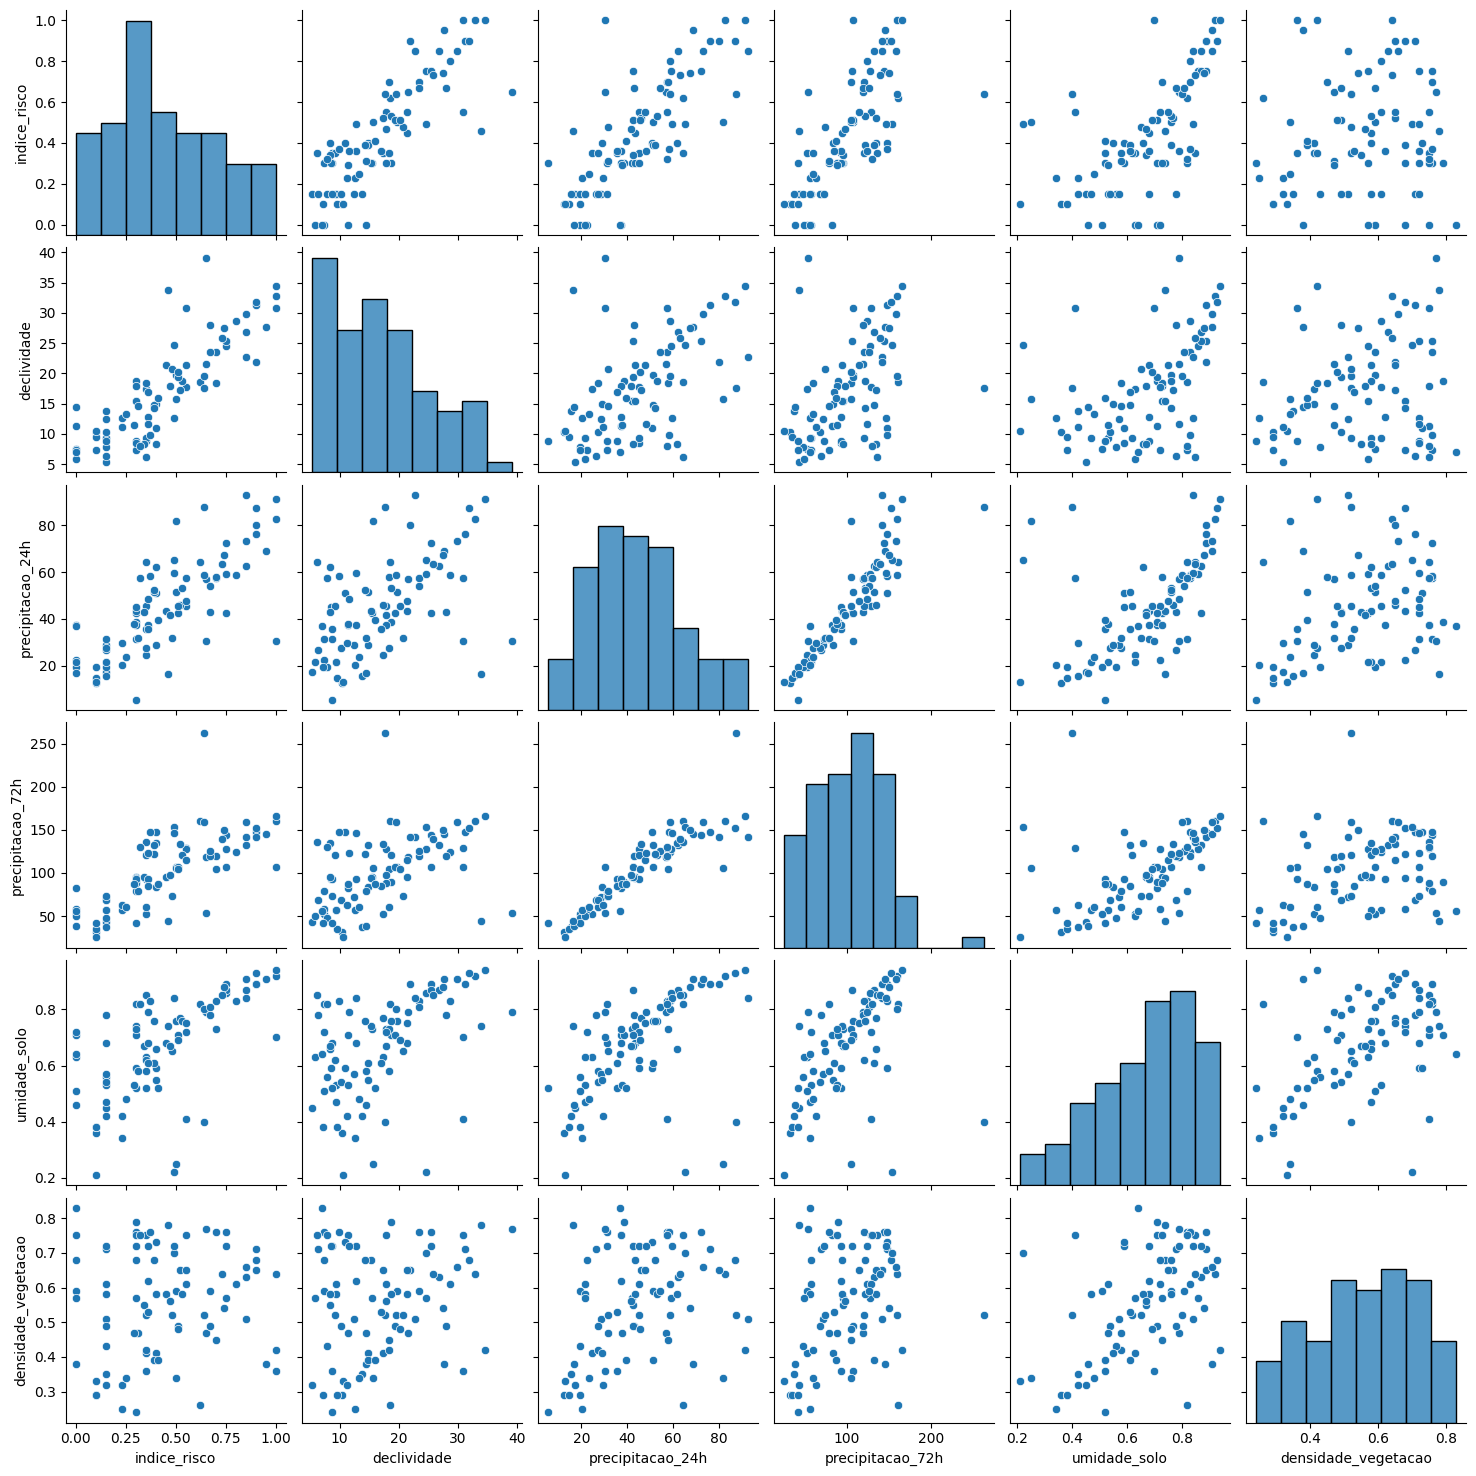

In [6]:
sns.pairplot(df[['indice_risco', 'declividade', 'precipitacao_24h', 'precipitacao_72h', 'umidade_solo', 'densidade_vegetacao']])